In [1]:
import numpy as np 
import pandas as pd

In [2]:
base_path = "data/output/"

In [3]:
#df_nebit_dnam_features = pd.read_csv("../graph_neural_networks/data/output/df_nebit_dnam_features.csv", sep=",")
df_nebit_dnam_features = pd.read_csv("data/output/df_nebit_dnam_features_only_positive.csv", sep="\t", header=None)
df_nebit_dnam_features

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1
1,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737,1
2,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768,1
3,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902,1
4,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,0.838889,0.839916,...,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859,5
11752,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461,1
11753,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461,1
11754,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5


In [4]:
output_gene_ranking_path = "data/output/output_gene_ranking_only_positive_corr" #"data/output/out_gene_rankings.csv"
df_apu_labels = pd.read_csv(output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,0.832421,1
1,cg00755661_CTTNBP2NL,0.831663,1
2,cg01343097_OR2M1P,0.835457,1
3,cg01833436_SDCCAG8,0.834424,1
4,cg01833436_AKT3,0.834424,1
...,...,...,...
11751,cg01909024_PAQR7,-0.552101,5
11752,cg02073054_IL19,0.810015,1
11753,cg02073054_IL19.1,0.810015,1
11754,cg05262634_CDCA8,-0.552093,5


In [5]:
'''l_name = list()
l_labels = list()
for i, item in df_nebit_dnam_features.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels'''

'l_name = list()\nl_labels = list()\nfor i, item in df_nebit_dnam_features.iterrows():\n    r_val = item.values\n    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]\n    if len(matched_row.index) > 0:\n        l_name.append(r_val[0])\n        l_labels.append(matched_row.values[0][2])\n\ndf_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])\ndf_labels'

In [21]:
labels_prec = df_nebit_dnam_features.loc[:, 39].tolist()
len(labels_prec)

11756

In [22]:
#nebit_dnam_features_embeddings = df_nebit_dnam_features.iloc[:, 3:]
nebit_dnam_features_embeddings = df_nebit_dnam_features.iloc[:, :-1]
nebit_dnam_features_embeddings

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,0.838889,0.839916,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import umap

n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings_prec = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features_embeddings)

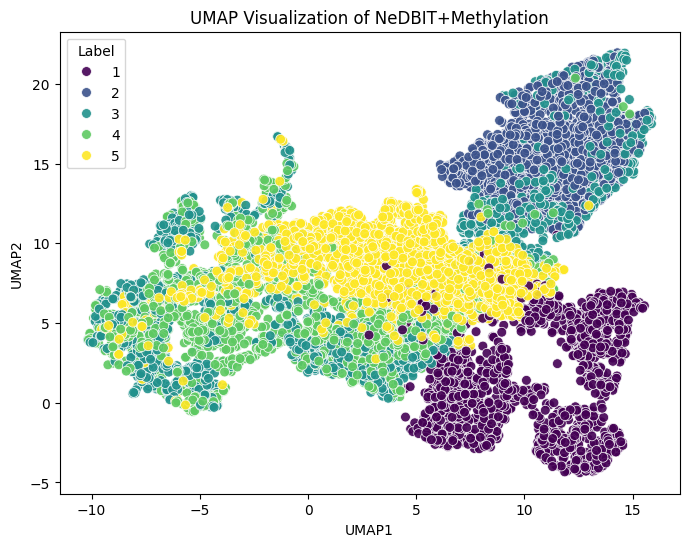

In [24]:
# Create a data frame with UMAP components and labels
umap_data = {"UMAP1": nebit_dnam_embeddings_prec[:, 0], "UMAP2": nebit_dnam_embeddings_prec[:, 1], "Label": labels_prec}
df_umap = pd.DataFrame(umap_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df_umap, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}_prec.pdf".format(n_neighbors, min_dist, "prec"))
plt.show()